In [3]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Загрузка данных
data = pd.read_csv('/Users/Arbiter/Documents/Airport_Stat/airstat.csv')

# Задание первое

Проверить количество поврежденных строк

In [4]:
good_symbols_string = 'A B C D E F G H I J K L M N O P Q R S T U V W X Y Z '
good_symbols_string += 'a b c d e f g h i j k l m n o p q r s t u v w x y z '
good_symbols_string += '- ) ( '
good_symbols_string += '0 1 2 3 4 5 6 7 8 9'
good_symbols = good_symbols_string.split(' ')
good_symbols.append(' ')

def bad_symbol(a, good_symbols):
    for i in a:
        if i not in good_symbols:
            return False
    return True

good_port_list = []

for i in data['Airport name']:
    if bad_symbol(i, good_symbols) == True:
        good_port_list.append(i)
        
df = data[data['Airport name'].isin(good_port_list) == True]
backup = data[data['Airport name'].isin(good_port_list) == False]

backup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 29 to 3911
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airport name  332 non-null    object
 1   Year          332 non-null    int64 
 2   January       332 non-null    int64 
 3   February      332 non-null    int64 
 4   March         332 non-null    int64 
 5   April         332 non-null    int64 
 6   May           332 non-null    int64 
 7   June          332 non-null    int64 
 8   July          332 non-null    int64 
 9   August        332 non-null    int64 
 10  September     332 non-null    int64 
 11  October       332 non-null    int64 
 12  November      332 non-null    int64 
 13  December      332 non-null    int64 
 14  Whole year    332 non-null    int64 
dtypes: int64(14), object(1)
memory usage: 41.5+ KB


Ответ: 332

In [5]:
backup

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year
29,Верхневилюйск,2020,0,0,0,0,0,0,0,0,0,0,0,0,0
47,Erbogaçen,2020,0,0,0,0,0,0,0,0,0,0,0,0,0
52,Zыrjanka,2020,0,0,0,0,0,0,0,0,0,0,0,0,0
86,Лешуконское,2020,0,0,0,0,0,0,0,0,0,0,0,0,0
103,Мотыгино,2020,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Çumikan,2007,0,0,0,0,0,0,0,0,0,0,0,0,0
3906,Şarıpovo,2007,0,0,0,0,0,0,0,0,0,0,0,0,0
3907,Shakhtars'k,2007,0,0,0,0,0,0,0,0,0,0,0,0,0
3908,Şoyna,2007,0,0,0,0,0,0,0,0,0,0,0,0,0


# Задание второе

Сколько аэропортов не принимают воздушные суда?

In [6]:
a = df.groupby('Airport name')['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Whole year'].agg('sum')
a = a.reset_index()
a[a['Whole year'] == 0]['Airport name'].count()

<ipython-input-6-37175b8acf89>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = df.groupby('Airport name')['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Whole year'].agg('sum')


162

Ответ: 162

# Задание третье

Сколько аэропортов прекратили работу в 2018 - 2020?

In [7]:
working_airport_df = df[((df['Whole year'] > 0) & (df['Year'] <= 2017))]

working_airport = list(working_airport_df['Airport name'])

df[(df['Airport name'].isin(working_airport) == True) & (df['Year'] == 2018 ) & (df['Whole year'] == 0)]

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year
3932,Plastun,2018,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df[(df['Airport name'].isin(working_airport) == True) & (df['Year'] == 2019 ) & (df['Whole year'] == 0)]

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year
3933,Plastun,2019,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df[(df['Airport name'].isin(working_airport) == True) & (df['Year'] == 2020 ) & (df['Whole year'] == 0)]

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year
215,Khabarovsk (MVL),2020,0,0,0,0,0,0,0,0,0,0,0,0,0
3934,Plastun,2020,0,0,0,0,0,0,0,0,0,0,0,0,0


Ответ: 2

# Задание четвертое

Какова разница между наиболее и наименее загруженным месяцем в тыс. человек?

In [10]:
import math

more_5_mln = df[(df['Whole year'] > 5000000) & (df['Year'] != 2020)]

more_5_mln_airport = set(more_5_mln['Airport name'])


less_5_mln = df[(df['Airport name'].isin(more_5_mln_airport) == False)]

In [11]:
top_50 = less_5_mln.groupby('Airport name')['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December','Whole year'].agg('sum')
top_50 = top_50.sort_values(by='Whole year', ascending = False)
top_50 = top_50.head(50)

<ipython-input-11-0a7022091cd4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_50 = less_5_mln.groupby('Airport name')['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December','Whole year'].agg('sum')


26114

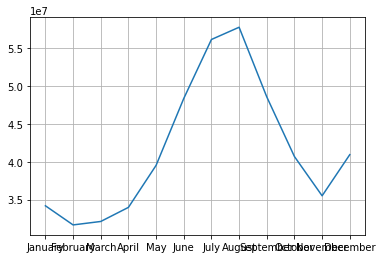

In [12]:
January = top_50['January'].sum()
February =  top_50['February'].sum()
March =  top_50['March'].sum()
April =  top_50['April'].sum()
May =  top_50['May'].sum()
June =  top_50['June'].sum()
July = top_50['July'].sum()
August =  top_50['August'].sum()
September =  top_50['September'].sum()
October =  top_50['October'].sum()
November =  top_50['November'].sum()
December =  top_50['December'].sum()

x = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
y = [January, February, March, April, May, June, July, August, September, October, November, December]

plt.grid(True)
plt.plot(x, y)

math.floor((August - February) / 1000)

Ответ: 26114

# Задание пятое

Укажите эти топ-5 аэропортов

In [14]:
result = {}

top_50 = top_50.reset_index()
top_50_list = list(top_50['Airport name'])

df_2007 = df[(df['Year'] == 2007) & (df['Airport name'].isin(top_50_list) == True) ]
df_2019 = df[(df['Year'] == 2019) & (df['Airport name'].isin(top_50_list) == True) ]

for i in top_50_list:
    if str(df_2019[df_2019['Airport name'] == i]['Whole year'].max()).isdigit()  == True:
        a = int(df_2019[df_2019['Airport name'] == i]['Whole year'].max())
    
        if str(df_2007[df_2007['Airport name'] == i]['Whole year'].max()).isdigit() == True:
            b = int(df_2007[df_2007['Airport name'] == i]['Whole year'].max())
            
            if b != 0:
                change = (a - b) / b
                result[i] = change
                
new_df = pd.DataFrame(index = result.keys(), data = result.values())
new_df.sort_values(by=0, ascending = False)

,0
Voronezh (Chertovitskoe),4.666927
Nizhny Novgorod (Strigino),3.167735
Astrakhan (Narimanovo),2.717216
Stavropol (Shpakovskoye),2.650072
Vladivostok (Knevichi),2.355048
Mineral water,2.354386
Krasnodar (Paszkowski),2.333465
Reads (tub),2.189672
Ufa,2.152946
Volgograd (Gumrak),2.152138


Ответ:
- Voronezh (Chertovitskoe)
- Nizhny Novgorod (Strigino)
- Astrakhan (Narimanovo)
- Stavropol (Shpakovskoye)
- Vladivostok (Knevichi)